# SVM: Máquinas de Soporte Vectorial
Este notebook explora el uso de SVM con kernel lineal y RBF usando datos simulados.

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Generar datos simulados
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_classes=2, random_state=42)

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [2]:
# Entrenar modelos SVM con kernel lineal y RBF
modelo_lineal = SVC(kernel='linear')
modelo_rbf = SVC(kernel='rbf')

modelo_lineal.fit(X_train, y_train)
modelo_rbf.fit(X_train, y_train)

# Evaluación
print("Precisión (Lineal):", accuracy_score(y_test, modelo_lineal.predict(X_test)))
print("Precisión (RBF):", accuracy_score(y_test, modelo_rbf.predict(X_test)))


Precisión (Lineal): 1.0
Precisión (RBF): 1.0


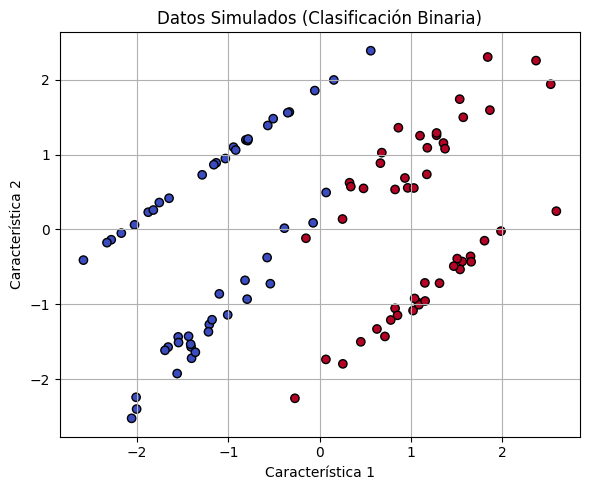

In [3]:
# Visualizar datos simulados
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("Datos Simulados (Clasificación Binaria)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.tight_layout()
plt.show()


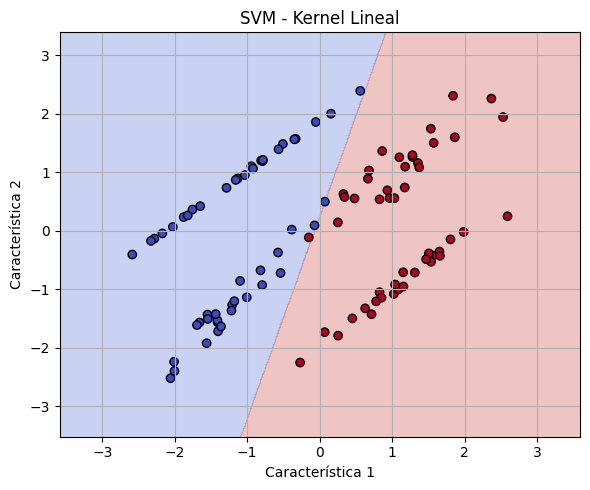

In [4]:
# Crear malla y visualizar SVM - Lineal
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z_lineal = modelo_lineal.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z_lineal, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM - Kernel Lineal")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.tight_layout()
plt.show()


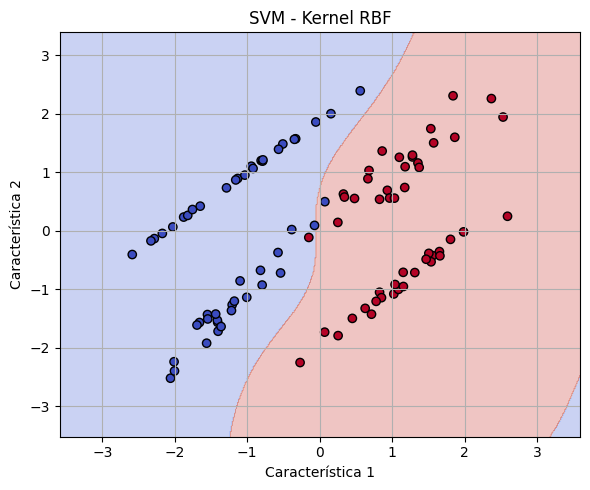

In [5]:
# Visualización SVM - RBF
Z_rbf = modelo_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z_rbf, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title("SVM - Kernel RBF")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusiones

- **SVM Lineal** es ideal para problemas donde las clases pueden separarse con una frontera recta.
- **SVM RBF** se adapta mejor a datos complejos con fronteras no lineales, aunque a costa de mayor tiempo de cómputo.
- Ambos requieren normalización previa de los datos.


### Visualización 3D de la Función de Decisión

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Función para graficar una superficie 3D para un modelo SVM
def plot_svm_3d(model, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Calcular decision function en la malla
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Superficie 3D
    ax.plot_surface(xx, yy, Z, cmap=cm.coolwarm, edgecolor='none', alpha=0.7)
    ax.set_title(f"Superficie de decisión SVM - {title}")
    ax.set_xlabel("Característica 1")
    ax.set_ylabel("Característica 2")
    ax.set_zlabel("Decision Function")
    ax.view_init(elev=30, azim=135)
    plt.tight_layout()
    plt.show()


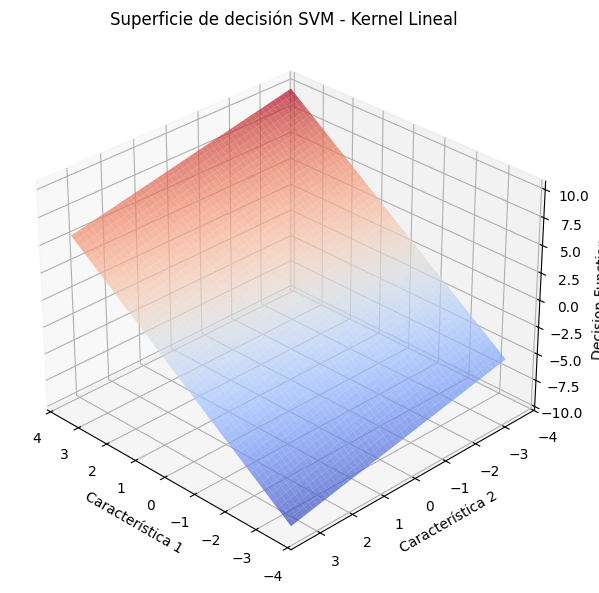

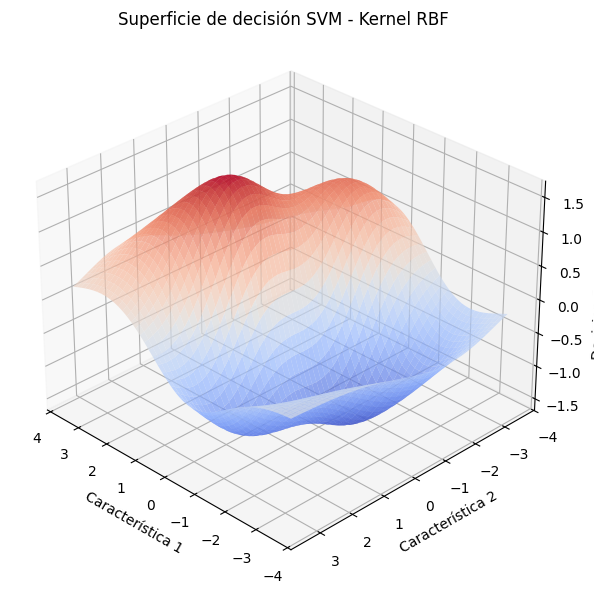

In [7]:
# Visualizar modelos SVM en 3D
plot_svm_3d(modelo_lineal, "Kernel Lineal")
plot_svm_3d(modelo_rbf, "Kernel RBF")
